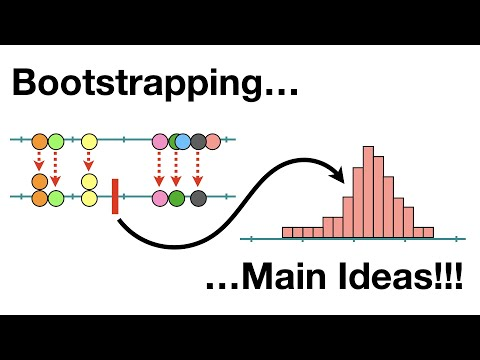

In [1]:

from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

Q1 (https://chatgpt.com/c/66f71852-ce44-8008-919b-974ef4c3607c):

Standard Deviation:
- This is the standard deviation of a single sample or population
- This does not depend on a sample size

Standard Error of Mean:
- Determines how accurately a sample mean can represent the actual population mean.
- Unlike Standard deviation, we are using the bootstrap means to create a distribution.
- Shows the 95% confidence interval of the boostrap means
- Show us the variability of the bootstrap/sample means to estimate the population mean
- Depends on sample size. A greater sample size will produce a lower Standard Error as we have more boostrap means, creating a better estimation.





Q2:
- We can take ±2 standard error
- Since we know that ±2σ will give us 95% of the data in a distribution
- Then we can say ±2 standard error will give us 95% confidence interval of a distribution of the bootstrap means

Q3:
- You could achieve this 95% confidence interval by getting the 2.5% and 97.5% quantile
- Then the 95% confidence would be the interval from the 2.5% percentile to the 97.5% percentile

Log for Q2, Q3: https://chatgpt.com/share/66f71bd6-2994-8008-a9c1-46f6ab4db569

Q4 (https://chatgpt.com/share/66f71f8f-bdf0-8008-b1a7-726ef8307676):

In [2]:
import numpy as np

# Example sample data
sample = np.array([12.4, 15.6, 14.2, 13.9, 16.8, 14.7, 15.2, 13.4, 14.5, 15.0])


# Bootstrap function (FOR MEAN)
def bootstrap_mean(sample, n_iterations=1000):
    np.random.seed(42) 
    means = np.empty(n_iterations)
    
    for i in range(n_iterations):
        bootstrap_sample = np.random.choice(sample, size=len(sample), replace=True)
        means[i] = np.mean(bootstrap_sample)
    
    return means

bootstrap_means = bootstrap_mean(sample)

conf_interval = np.percentile(bootstrap_means, [2.5, 97.5])

print(f"95% Bootstrap Confidence Interval: [{round(conf_interval[0], 2)}, {round(conf_interval[1], 2)}]")

95% Bootstrap Confidence Interval: [13.81, 15.26]


In [3]:
# Bootstrap function (FOR MEDIAN)
def bootstrap_medians(sample, n_iterations=1000):
    np.random.seed(42)  
    medians = np.empty(n_iterations) # You can change the name
    
    for i in range(n_iterations):
        bootstrap_sample = np.random.choice(sample, size=len(sample), replace=True)
        medians[i] = np.quantile(sample, [0.5]) # Change by using np.quantile(...) to calculate median of each bootstrap sample
    
    return medians

bootstrap_medians = bootstrap_medians(sample)

conf_interval = np.percentile(bootstrap_medians, [2.5, 97.5])

print(f"95% Bootstrap Confidence Interval: [{round(conf_interval[0], 2)}, {round(conf_interval[1], 2)}]")

95% Bootstrap Confidence Interval: [14.6, 14.6]


Q5 (https://chatgpt.com/share/66fc812c-d0b8-8008-b380-c1d5d6adc0ec)

- Population parameter does not change (it's fixed)
- Sample statistic changes depending on the indepedently chosen sample
- This distintion is important when trying to estimate the population parameter by using the sample statistics.
- When creating a confidence interval, we are saying that if we repeatedly take samples and created confidence intervals from those samples, then 95% those samples will construct a confidence interval that captures the popuation parameter (which does not ever change).
- It also indicates that the sample statistics changes due to variability/uncertainty

Q6

1. You are given a few pieces of data (called a sample) from a big set of data (called a population). Then you repeatedly take values from the original sample such that you may repeat values and the number of values you use in this new sample is the same number of values in the original sample – this is called the bootstrap sample. For each bootstrap sample, you find the average by dividing the summation of all values by 2. You repeat this as many times as you would like. Then, using these averages you can estimate the variability/uncertainty of the actual average (parameter) of the big datset (population). 

2. It can estimate how a statistic (ie mean, median, etc) can vary. It helps us understand the variability/uncertainty that a sample will capture the population mean. 

3. You can bootstrap a sample of size n to find the averages varies between samples. Since you know the variability of the average, you can create something called a 'confidence interval.' You can think of this as percentage (usually 95%) of samples that will contain the actual average of the big dataset. If you make a hypothesis and it is not apparent in the confidence interval, then it is unlikely for it to be plausible.

Q7 (https://chatgpt.com/share/66ff1d8a-7264-8008-adff-fc9bbcdcdaee)

Why does a confidence interval overlapping zero "fail to reject the null hypothesis" when the observed sample mean statistic itself is not zero?
- The observed sample mean statistic is different than the population mean. The observed sample mean is just an instance of the population, so it may or may not represent the population mean.
- The confidence interval shows use that 95% chosen samples will contain the population mean.
- This means that for a population, it is more likely for the null hypothesis.

Alternatively, what would lead to the opposite conclusion in this context; namely, instead choosing "to reject the null hypothesis"?
- if the 95% confidence interval does not capture/overlap 0.

Q8 (https://chatgpt.com/share/66ff1da1-a544-8008-b469-6c4d3f120dce, https://chatgpt.com/share/66ff1daf-35a8-8008-8f24-1b199adb5bce)

- **Problem Introduction**
    - An explaination of the meaning of a Null Hypothesis of "no effect" in this context
        - In this scenario, we are trying to see the change between the final and initial health score.
        - The Null Hypothesis of 'no effect' means that if the difference of 0 is in the 95% confidence interval.
    
    - Data Visualization (motivating and illustrating the comparison of interest)
        - Shown Below
       
- **Quantitative Analysis**
    - Methodology Code and Explanations
        - Used bootstrapping on the differences between the initial and final health score
        - I create a new dataset that takes the difference between the final and initial heal scores for each observation/entry. 
        - I create 10000 bootstrap samples using the new dataset (which is derived from the observed sample data).
        - For each bootstrap sample, I find the mean and append it to a list.
        - Then I calculate the mean and 95% confidence interval of the bootstrap samples.
        - Then I represent the boostrap samples using a histogram, and use vertical lines to show the mean and 95% confidence interval.
        - This way, it can help me verify if the vaccine is effective for the population.
        
    - Supporting Visualizations
        - Shown Below
        
- **Findings and Discussion**
    - Conclusion regarding a Null Hypothesis of "no effect"
        - Using this analysis, we conclude in the rejection of the null hypothesis.
        - We see that the difference of 0 (ie the vaccine having no effect) is not in the 95% confidence interval.
        - Thus, since 95% of samples will not capture 0, it means that we are able to reject the null hypothesis.
        
    - Further Considerations
        - Long term effects of the vaccine
        - If this vaccine is ethical to produce
        - Bootstrapping implies that each sample is independent of each other.
        - AliTech could have introduced bias (ie selecting most optimal candidates)


In [4]:
import pandas as pd
from io import StringIO

# Your CSV data as a string
data = """PatientID,Age,Gender,InitialHealthScore,FinalHealthScore
1,45,M,84,86
2,34,F,78,86
3,29,M,83,80
4,52,F,81,86
5,37,M,81,84
6,41,F,80,86
7,33,M,79,86
8,48,F,85,82
9,26,M,76,83
10,39,F,83,84"""

# Use StringIO to simulate reading from a file
df = pd.read_csv(StringIO(data))

# Display the DataFrame
print(df)


   PatientID  Age Gender  InitialHealthScore  FinalHealthScore
0          1   45      M                  84                86
1          2   34      F                  78                86
2          3   29      M                  83                80
3          4   52      F                  81                86
4          5   37      M                  81                84
5          6   41      F                  80                86
6          7   33      M                  79                86
7          8   48      F                  85                82
8          9   26      M                  76                83
9         10   39      F                  83                84


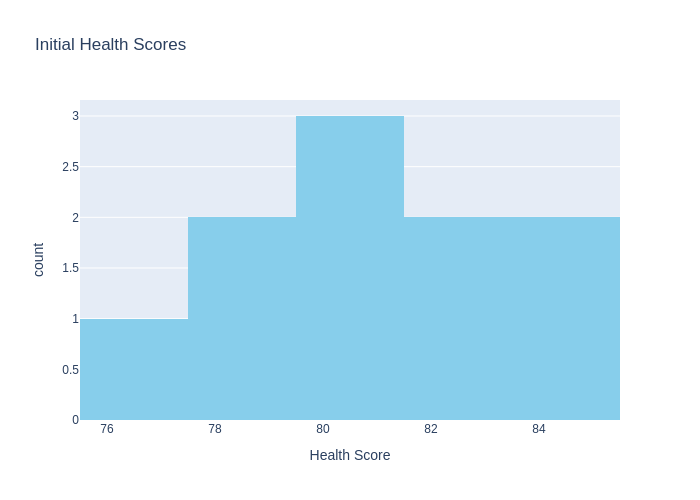

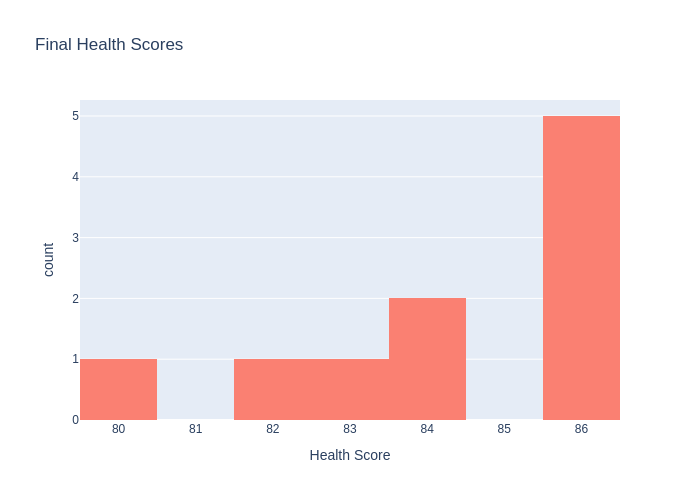

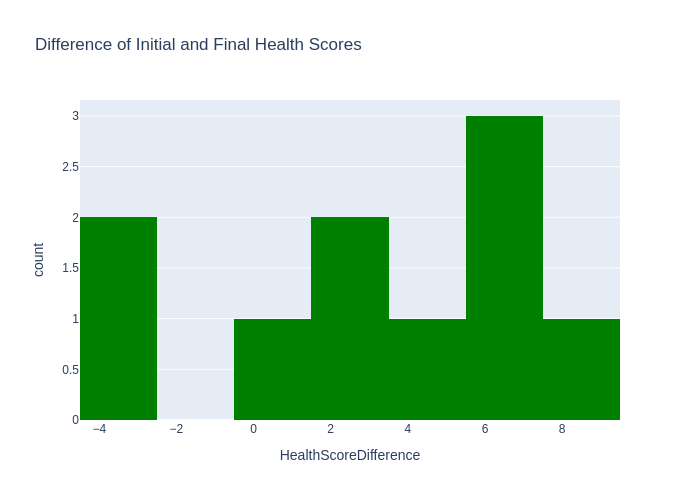

In [9]:
import pandas as pd
from io import StringIO
import plotly.express as px

# Your CSV data as a string
data = """PatientID,Age,Gender,InitialHealthScore,FinalHealthScore
1,45,M,84,86
2,34,F,78,86
3,29,M,83,80
4,52,F,81,86
5,37,M,81,84
6,41,F,80,86
7,33,M,79,86
8,48,F,85,82
9,26,M,76,83
10,39,F,83,84"""

# Use StringIO to simulate reading from a file
df = pd.read_csv(StringIO(data))


# Calculate the initial and final health score differences
df['HealthScoreDifference'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Create histograms for Initial and Final Health Scores using Plotly Express
fig1 = px.histogram(df, x='InitialHealthScore', nbins=8, title='Initial Health Scores', 
                     labels={'InitialHealthScore': 'Health Score'}, 
                     color_discrete_sequence=['skyblue'])

fig2 = px.histogram(df, x='FinalHealthScore', nbins=8, title='Final Health Scores', 
                     labels={'FinalHealthScore': 'Health Score'}, 
                     color_discrete_sequence=['salmon'])

fig3 = px.histogram(df, x='HealthScoreDifference', nbins=8, title='Difference of Initial and Final Health Scores', 
                     labels={'Difference of Initial and Final Health Score': 'Health Score'}, 
                     color_discrete_sequence=['green'])

# Show the plots
fig1.show(renderer='png')
fig2.show(renderer='png')
fig3.show(renderer='png')


Bootstrapped Mean Difference: 3.31
95% Confidence Interval: [0.90, 5.60]


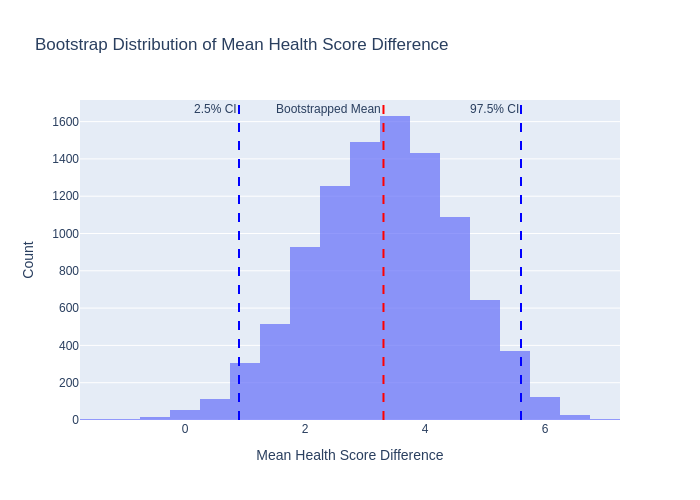

In [6]:
import pandas as pd
import numpy as np
from io import StringIO
import plotly.express as px

# Your CSV data as a string
data = """PatientID,Age,Gender,InitialHealthScore,FinalHealthScore
1,45,M,84,86
2,34,F,78,86
3,29,M,83,80
4,52,F,81,86
5,37,M,81,84
6,41,F,80,86
7,33,M,79,86
8,48,F,85,82
9,26,M,76,83
10,39,F,83,84"""

# Use StringIO to simulate reading from a file
df = pd.read_csv(StringIO(data))

# Calculate the initial and final health score differences
df['HealthScoreDifference'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Bootstrap parameters
n_iterations = 10000  # Number of bootstrap samples
boot_means = []       # Store bootstrap means

# Bootstrap sampling
for _ in range(n_iterations):
    # Random sample with replacement
    sample = df['HealthScoreDifference'].sample(n=len(df), replace=True)
    boot_means.append(sample.mean())

# Calculate the mean of bootstrap means
mean_bootstrap = np.mean(boot_means)

# Calculate the 95% confidence interval
conf_interval = np.percentile(boot_means, [2.5, 97.5])

# Output results
print(f"Bootstrapped Mean Difference: {mean_bootstrap:.2f}")
print(f"95% Confidence Interval: [{conf_interval[0]:.2f}, {conf_interval[1]:.2f}]")

# Create a DataFrame for the bootstrap means
boot_means_df = pd.DataFrame(boot_means, columns=['MeanDifference'])

# Plotting the histogram of bootstrap means using Plotly Express
fig = px.histogram(
    boot_means_df,
    x='MeanDifference',
    nbins=30,
    title='Bootstrap Distribution of Mean Health Score Difference',
    labels={'MeanDifference': 'Mean Health Score Difference'},
    opacity=0.7
)

# Add lines for mean and confidence interval
fig.add_vline(x=mean_bootstrap, line_color='red', line_dash='dash', annotation_text='Bootstrapped Mean', annotation_position='top left')
fig.add_vline(x=conf_interval[0], line_color='blue', line_dash='dash', annotation_text='2.5% CI', annotation_position='top left')
fig.add_vline(x=conf_interval[1], line_color='blue', line_dash='dash', annotation_text='97.5% CI', annotation_position='top left')

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Mean Health Score Difference',
    yaxis_title='Count',
    showlegend=True
)

# Show the plot
fig.show(renderer='png')
